<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/4%20-%20SVM/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SVM - Support Vector Machines

### Importiamo i moduli

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Definiamo le costanti

In [2]:
RANDOM_SEED = 0

### Definiamo le funzioni

In [20]:
def plot_decision_boundary(model, data, sv=None):
    
    X, Y = data
    h = .02 

    x_min, x_max = X[:, 0].min()-.1, X[:, 0].max()+.1
    y_min, y_max = X[:, 1].min()-.1, X[:, 1].max()+.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    X_m = X[Y==1]
    X_b = X[Y==0]
    plt.scatter(X_b[:, 0], X_b[:, 1], c="green",  edgecolor='white')
    plt.scatter(X_m[:, 0], X_m[:, 1], c="red",  edgecolor='white')

    if sv is not None:
          plt.scatter(sv[:, 0], sv[:, 1], c="blue",  edgecolor='white')

In [11]:
def classifier_report(model, data):
  X, y = data
  y_pred = model.predict(X)
  report = classification_report(y_pred, y)
  print(report)

### Generiamo il dataset

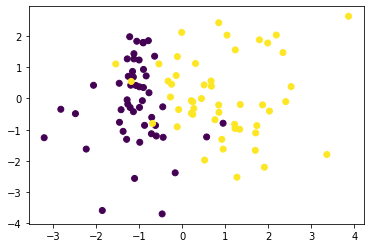

In [12]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=RANDOM_SEED)
plt.scatter(X[:,0], X[:,1], c=y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

### Addestriamo un Support Vector Classifier Lineare

In [29]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
classifier_report(svc, (X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



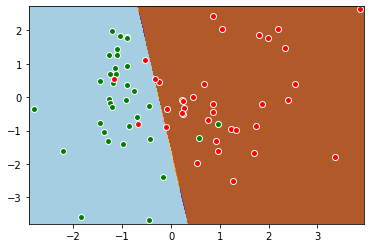

In [31]:
plot_decision_boundary(svc, (X_train, y_train))

### Visualizziamo i Support Vector

In [32]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
classifier_report(svc, (X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



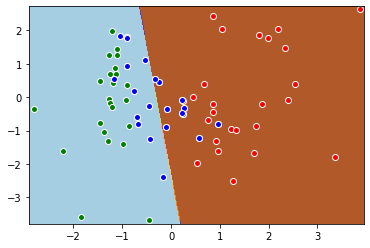

In [33]:
plot_decision_boundary(svc, (X_train, y_train), sv=svc.support_vectors_)

### Rimuoviamo un outlier e ri-addestriamo il modello

In [56]:
(X_train[:,0]>3)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [58]:
outlier_index = np.where(X_train[:,0]>3)

In [59]:
X_train[outlier_index,:]

array([[[ 3.86274219,  2.63325914],
        [ 3.35973253, -1.79506345]]])

In [60]:
X_train2 = np.delete(X_train, outlier_index, axis=0)
y_train2 = np.delete(y_train, outlier_index)

In [61]:
X_train2.shape

(68, 2)

In [62]:
X_train.shape

(70, 2)

In [63]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")
svc.fit(X_train2, y_train2)
classifier_report(svc, (X_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



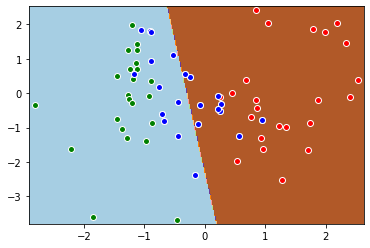

In [64]:
plot_decision_boundary(svc, (X_train2, y_train2), sv=svc.support_vectors_)